<a href="https://colab.research.google.com/github/oshvil2020/Student-study/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction


## 1- Is there any ralationship between parents education and (Math or Port) notes?
## 2- Is there any ralationship between parents salary on students' notes?
## 3- effect of parents job on notes?


school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3

# import liberery 

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
rel_add = '/content/drive/MyDrive/Colab Notebooks/Homework/Student-Study/'

In [ ]:
df1 = pd.read_csv(rel_add + 'student-mat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework/Student-Study/student-por.csv')

## Version of each library

In [6]:
pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, scipy, matplotlib
Required-by: missingno


In [7]:
pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: cycler, pyparsing, numpy, python-dateutil, kiwisolver
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [13]:
pip show numpy

Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, xarray-einstats, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, fo

In [14]:
pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


# Abbreviation

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)
Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

# Data explorer

In [ ]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# finding null cells

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#1 Correlation

Text(0.5, 1.0, 'Correlation Map for Math s class')

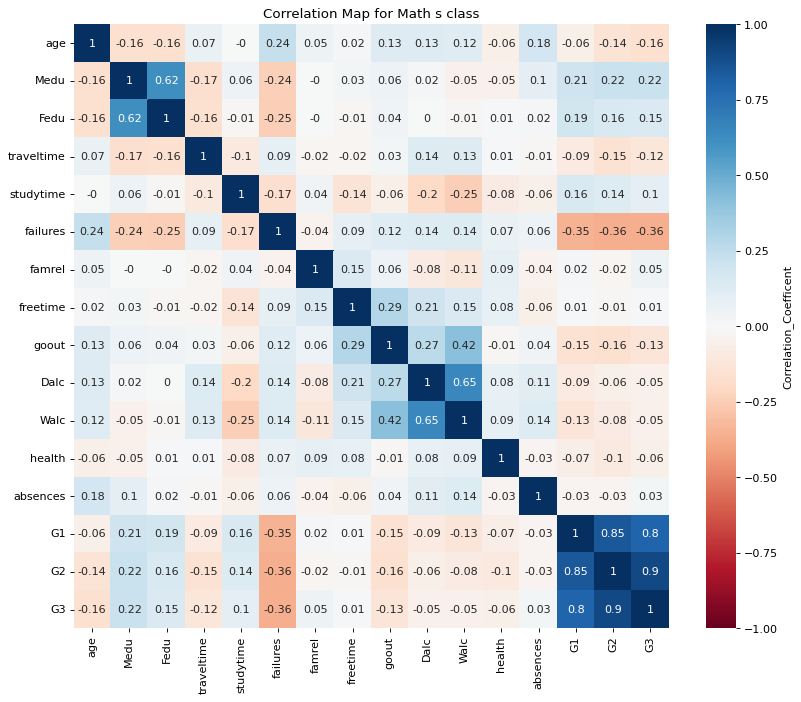

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10) , dpi = 80 )
sns.heatmap(np.round(df1.corr(),2), annot=True, ax =ax , cmap = "RdBu", vmax = 1 , vmin = -1,cbar_kws={'label':'Correlation_Coefficent'}).set_title("Correlation Map for Math s class")

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
z = ["school","sex","address","famsize","Fjob","Mjob", "Pstatus","reason" , "guardian" , "schoolsup", "famsup","higher" , "internet" , "romantic", "paid", "nursery" , "activities"]
p = ['school', 'sex',  'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [ ]:
le = LabelEncoder()
for i in p:
  df1[i] = le.fit_transform(df1[i])

In [ ]:
# df3 = []
# for i in p:
#   df3.append(df1[i])

In [ ]:
df_corr = df1.corr()

In [ ]:
df_corr

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,0.242308,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.093938,-0.025731,-0.063913,-0.054514
sex,-0.012286,1.000000,-0.028606,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,0.059722,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.050376,0.091839,0.096977,0.107966
age,0.377610,-0.028606,1.000000,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,0.070641,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.189428,-0.064081,-0.157273,-0.164677
famsize,0.064866,0.089862,0.037847,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,0.063493,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.049628,0.071445,0.078682,0.077208
Pstatus,0.045923,0.023443,0.029598,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,0.028265,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.125566,-0.016868,-0.041874,-0.054756
Medu,-0.133333,0.078228,-0.163658,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,-0.171639,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.114062,0.205341,0.227566,0.221824
Fedu,-0.079807,0.034878,-0.163438,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,-0.158194,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024176,0.190270,0.177184,0.160467
Mjob,-0.056670,0.191421,-0.069104,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,-0.109752,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.062613,0.081674,0.100492,0.103090
Fjob,0.018974,0.084957,-0.035191,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,0.055878,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,-0.009792,0.057661,0.065156,0.049534
traveltime,0.242308,0.059722,0.070641,0.063493,0.028265,-0.171639,-0.158194,-0.109752,0.055878,1.000000,...,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.017898,-0.093040,-0.145001,-0.118814


In [ ]:
for i in range(len(df_corr.columns)):
  for j in range(len(df_corr)):
    if df_corr.iloc[i][j] <= 0.4:
      df_corr.iloc[i][j] = 0

In [ ]:
df_corr

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
sex,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
age,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
famsize,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Pstatus,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Medu,0.0,0.0,0.0,0.0,0.0,1.000000,0.623455,0.454805,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Fedu,0.0,0.0,0.0,0.0,0.0,0.623455,1.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Mjob,0.0,0.0,0.0,0.0,0.0,0.454805,0.000000,1.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Fjob,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
traveltime,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


#2 Normal distribution 

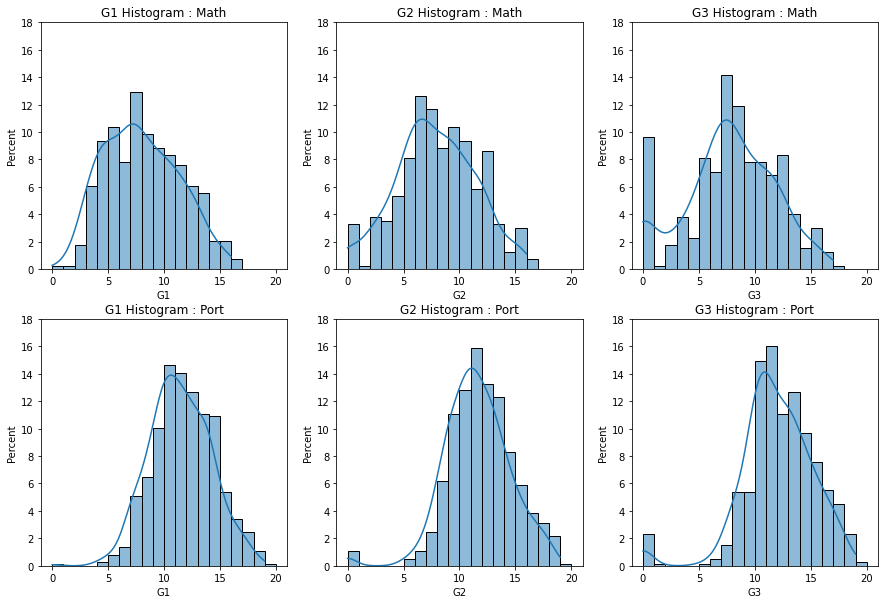

In [ ]:
fig, ax = plt.subplots(nrows= 2, ncols=3 , figsize = (15,10))
for i , colomn in enumerate(['G1','G2','G3']):
  sns.histplot(data=df1 , x = colomn , ax= ax[0][i], binwidth= 1 , binrange = (0,20), kde = True, stat = 'percent').set(title = f"{colomn} Histogram : Math" , ylim = (0,18))

  sns.histplot(data=df2 , x = colomn , ax= ax[1][i], binwidth= 1 , binrange = (0,20), kde = True, stat = 'percent').set(title = f"{colomn} Histogram : Port" , ylim = (0,18))


for two cours of Math and Portuguese, there is (approximaticaly) normale distribution, in three semesters. 

## School

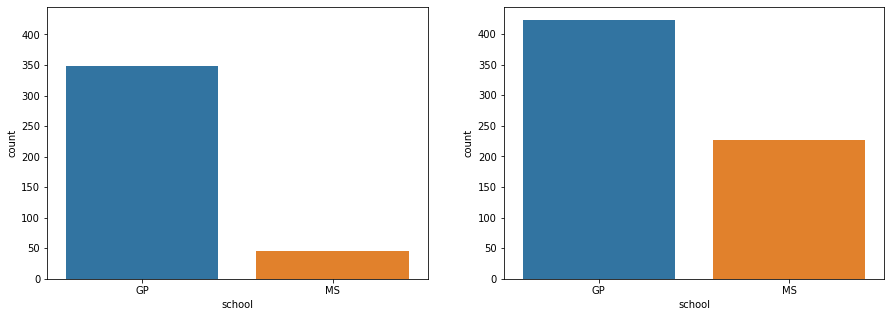

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=2 , figsize = (15,5))
sns.countplot(data= df1, x="school" , ax = ax[0]).set_ylim(0,445)
sns.countplot(data= df2, x="school" , ax = ax[1])

## Sex

Text(0.5, 1.0, 'number of Male vs Female in Portuguese')

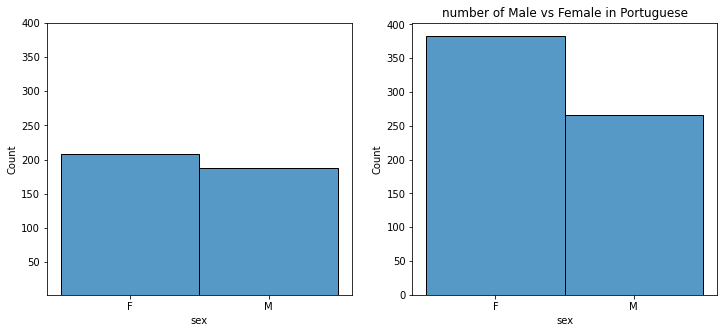

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=2 , figsize = (12,5))
sns.histplot(x="sex", data=df1, ax= ax[0]).set_ylim(2,400)
sns.histplot(x="sex", data=df2, ax= ax[1]).set_title("number of Male vs Female in Portuguese") 

#3 fedu  Medu
  

(0.0, 16.0)

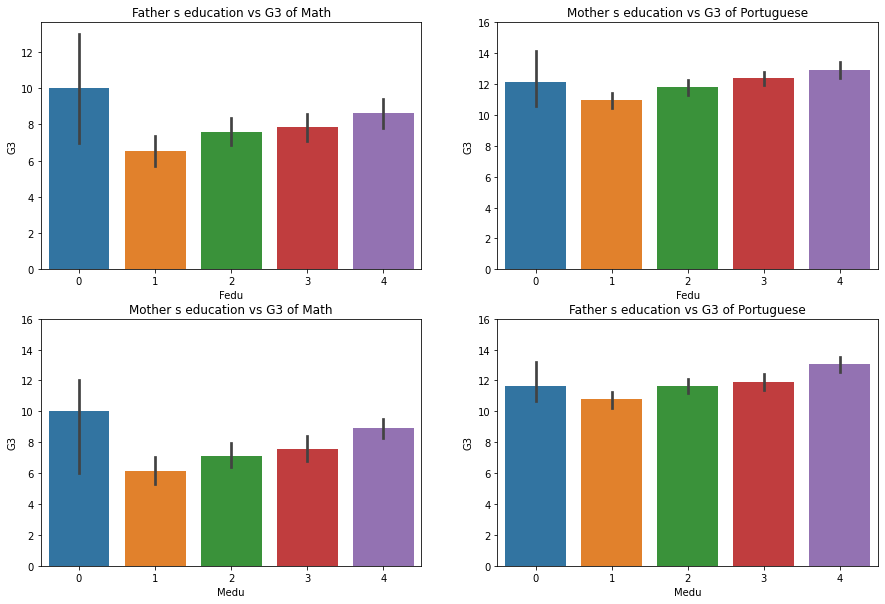

In [ ]:
fig, ax = plt.subplots(nrows= 2, ncols=2 , figsize = (15,10))
sns.barplot(x="Fedu", y="G3", data=df1, ax= ax[0][0]).set_title('Father s education vs G3 of Math')
sns.barplot(x="Fedu", y="G3", data=df2, ax= ax[0][1]).set_title('Mother s education vs G3 of Portuguese')
ax[0][1].set_ylim(0,16)
sns.barplot(x="Medu", y="G3", data=df1, ax= ax[1][0]).set_title('Mother s education vs G3 of Math')
ax[1][0].set_ylim(0,16)
sns.barplot(x="Medu", y="G3", data=df2, ax= ax[1][1]).set_title('Father s education vs G3 of Portuguese')
ax[1][1].set_ylim(0,16)

The more parents are educated, the better results their children will get. 


And there is no significant difference between mother and father s education, any one of them can affect the child ‘s future results.

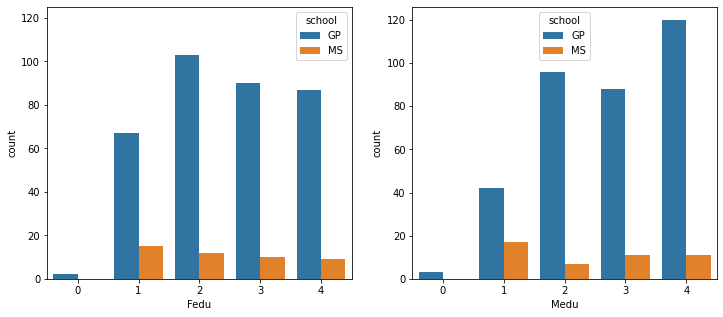

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=2 , figsize = (12,5))

sns.countplot(data= df1, x= "Fedu", hue= "school", ax = ax[0]).set_ylim(0,125)
sns.countplot(data= df1, x= "Medu", hue= "school", ax = ax[1])

no significant difference between mother and father s education in two school.

In GP groupe, there are more students with educated mother than other categories. However, there is no significant relationship between them.

#4 distribution of parents job

[Text(0, 0, 'teacher'),
 Text(0, 0, 'other'),
 Text(0, 0, 'service Fjob'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'at_home')]

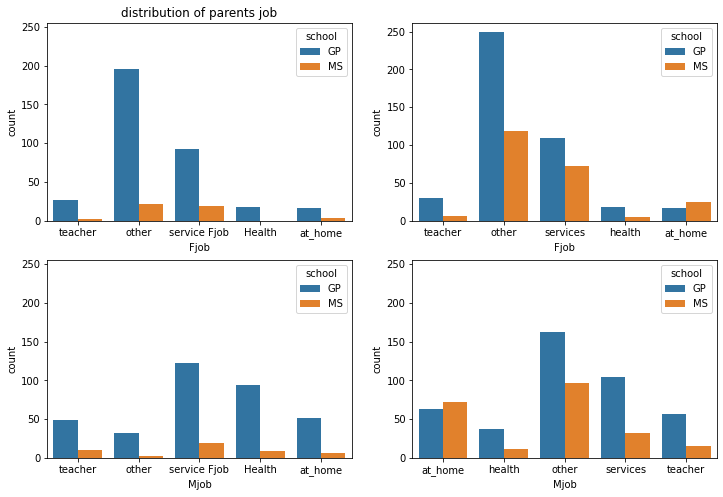

In [ ]:
fig, ax = plt.subplots(nrows= 2, ncols=2 , figsize = (12,8))

sns.countplot(data= df1, x= "Fjob", hue= "school", ax = ax[0][0]).set_title("distribution of parents job")
ax[0][0].set_ylim(0,255)
sns.countplot(data= df2, x= "Fjob", hue= "school", ax = ax[0][1])
sns.countplot(data= df1, x= "Mjob", hue= "school", ax = ax[1][0]).set_ylim(0,255)
sns.countplot(data= df2, x= "Mjob", hue= "school", ax = ax[1][1]).set_ylim(0,255)

ax[0][0].set_xticklabels(["teacher","other","service Fjob","Health","at_home"])
# ax[1][0].set_xticklabels(["teacher","other","service Fjob","Health","at_home"])


Most of the parents work in civil services. 
The fathers that work for health care are less than other jobs.

# 5 Study time

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

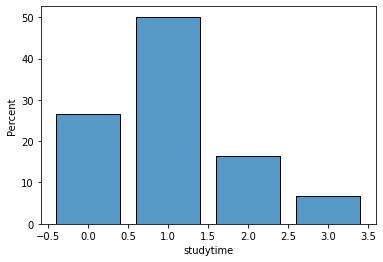

In [ ]:
sns.histplot(data=df1, x= 'studytime', discrete=True,shrink= 0.8,stat= 'percent')

Text(0.5, 1.0, 'study time for Port')

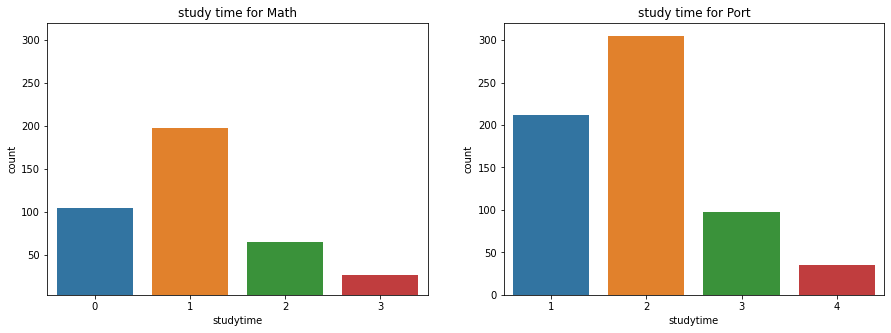

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols=2 , figsize = (15,5))
sns.countplot(data= df1, x= "studytime", ax= ax[0] ).set_ylim(4,320)

ax[0].set_title("study time for Math")
sns.countplot(data= df2, x= "studytime", ax= ax[1]).set_title("study time for Port")

most of students, study around 2 to 5 hours per week.

# seaborn

Text(0.5, 1.0, 'Correlation Map for Math s class')

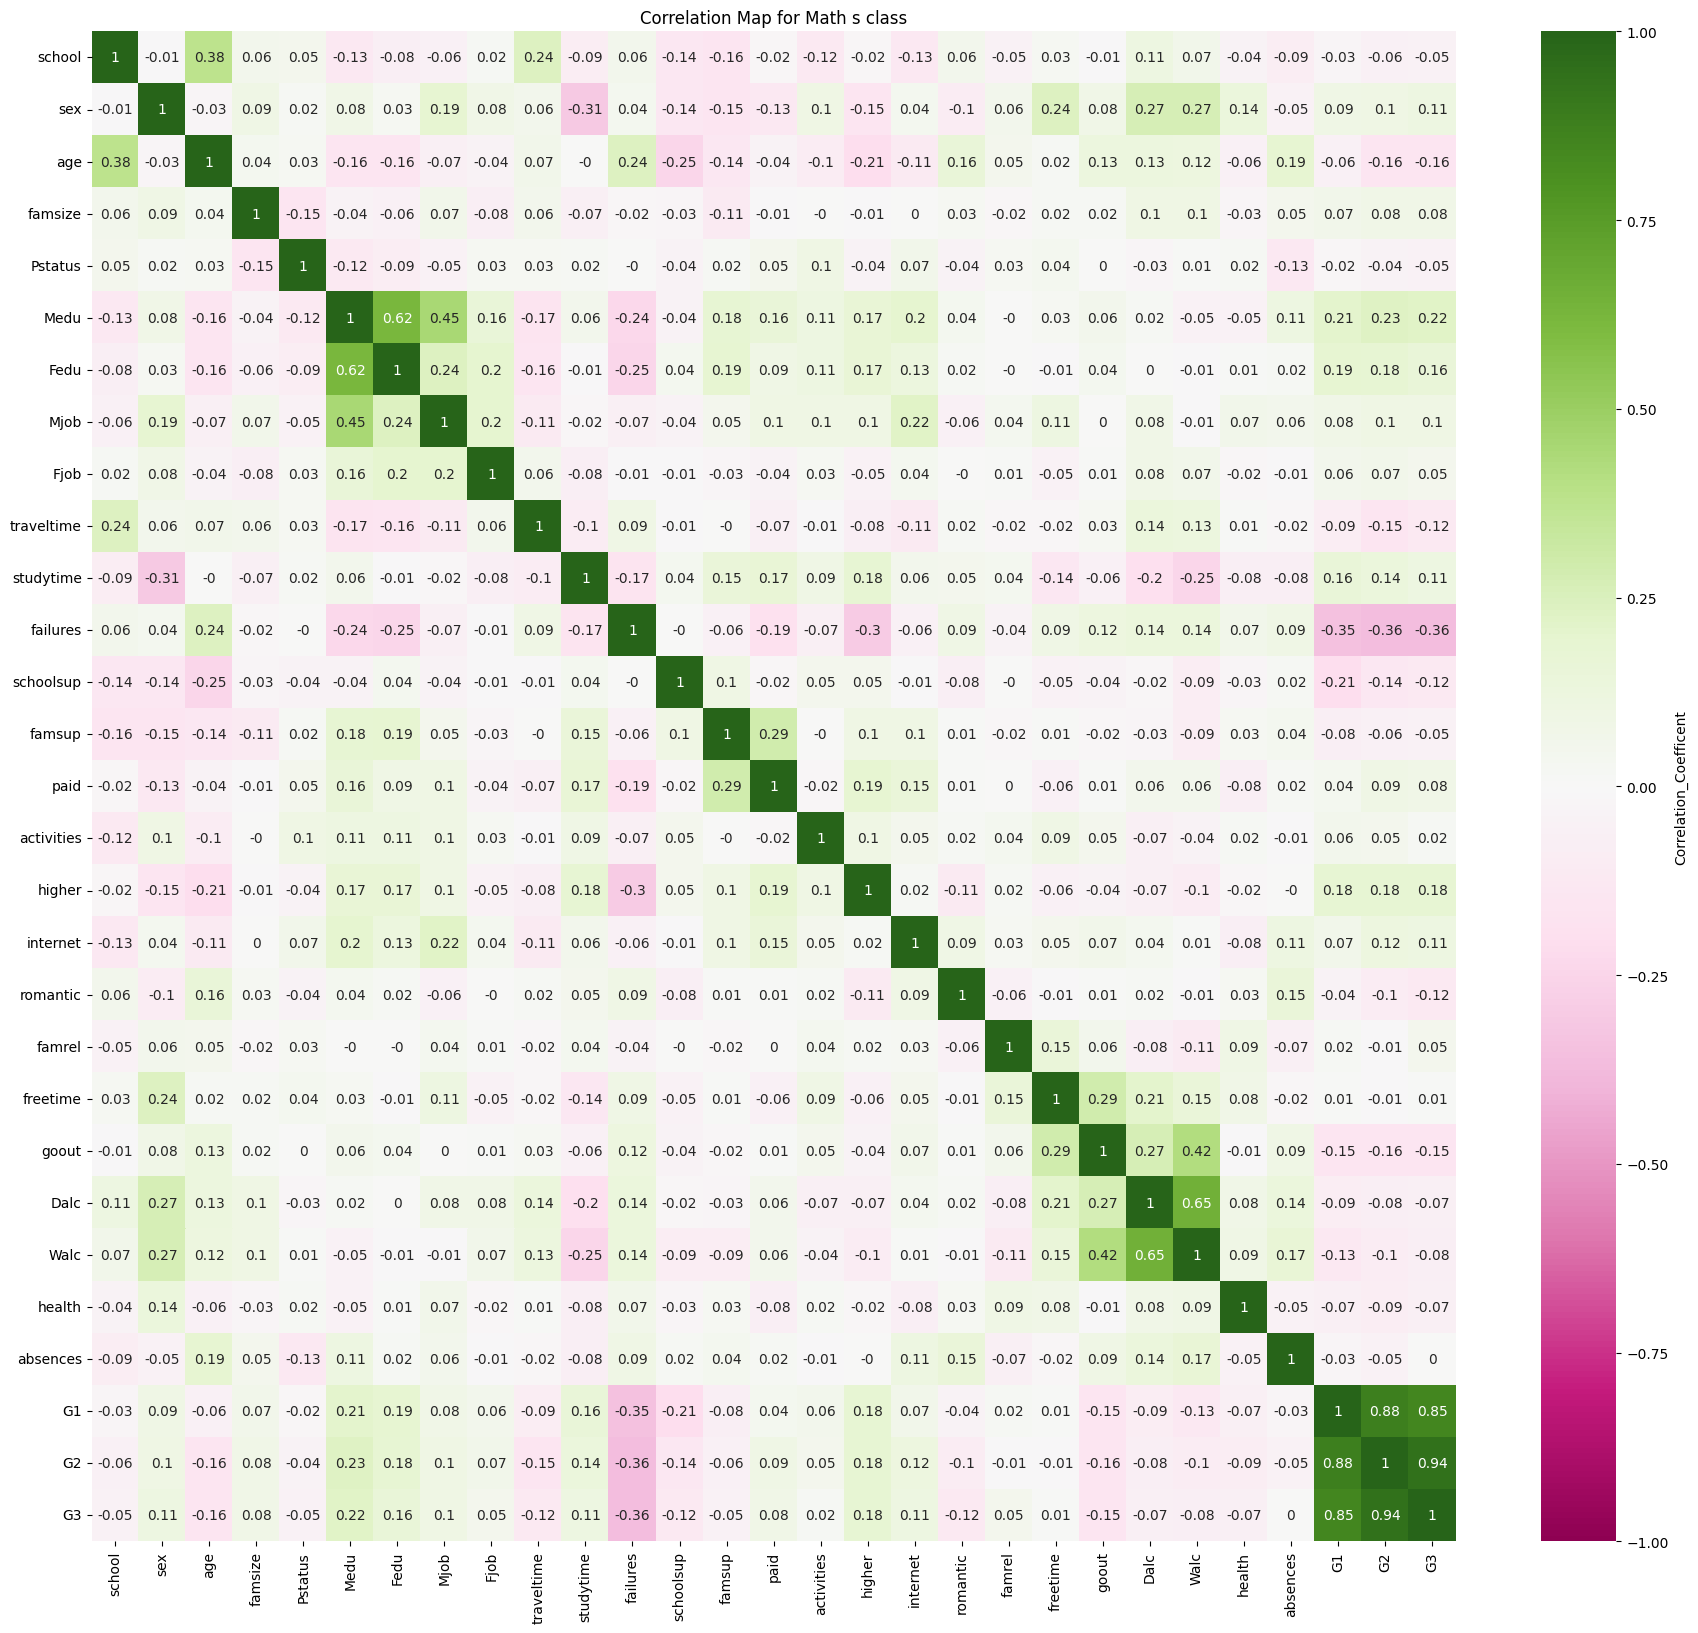

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize= (22,20),dpi= 100)
sns.heatmap(np.round(df1.corr(),2), ax = ax, annot = True , vmax = 1 , vmin = -1, cmap = 'PiYG',cbar_kws={'label':'Correlation_Coefficent'}).set_title("Correlation Map for Math s class")

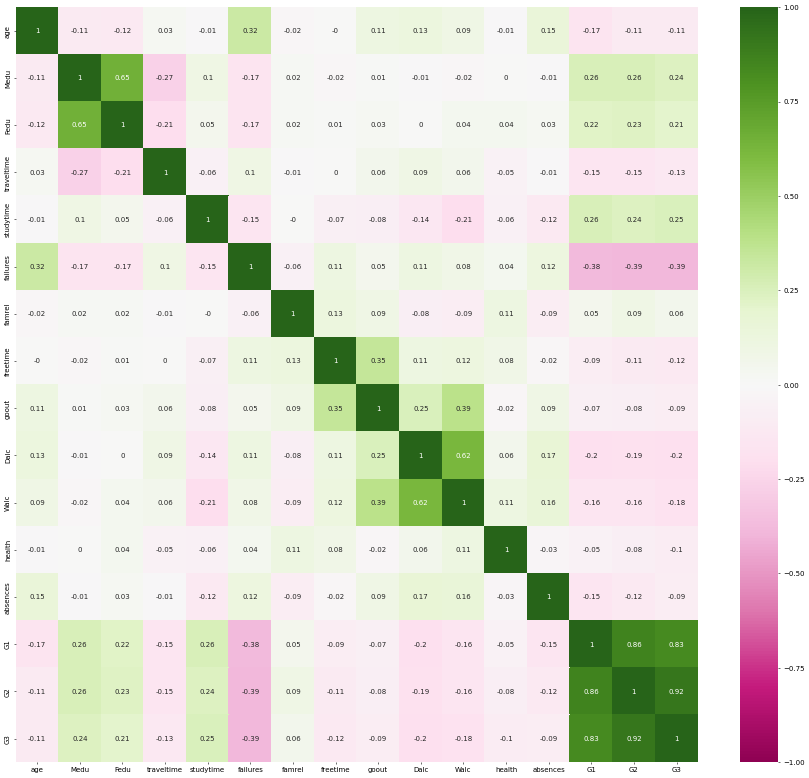

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize= (22,20),dpi= 50)
sns.heatmap(np.round(df2.corr(),2), ax = ax, annot = True , vmax = 1 , vmin = -1, cmap = 'PiYG')

# 0

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


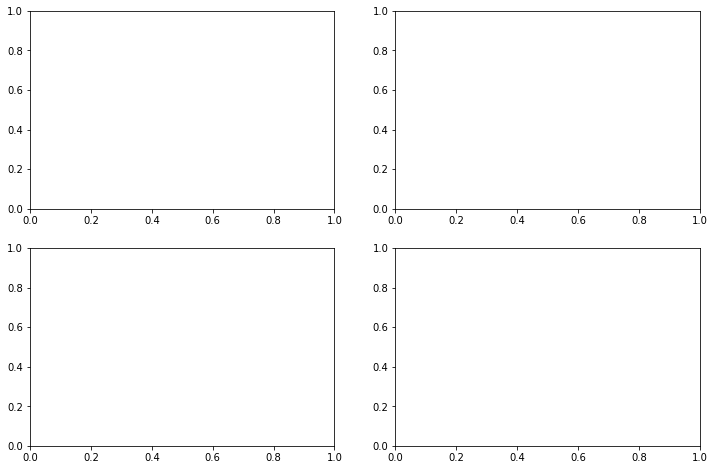

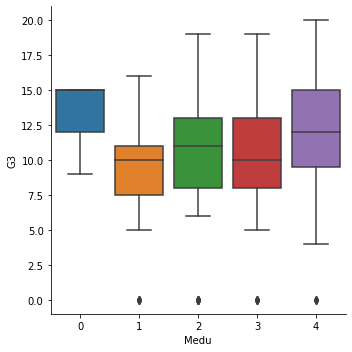

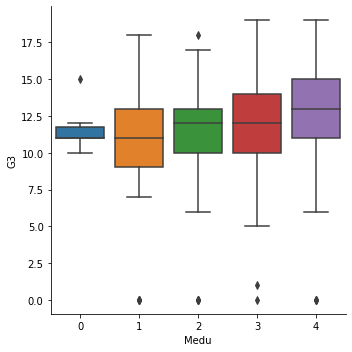

In [ ]:
fig, ax = plt.subplots(nrows= 2, ncols=2 , figsize = (12,8))

sns.catplot(x="Medu",y="G3", kind="box",data=df1 , ax = ax[0][0])
sns.catplot(x="Medu",y="G3", kind="box",data=df2 , ax = ax[0][1])

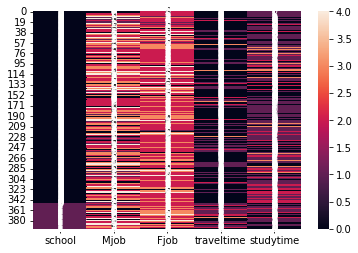

In [ ]:
df1 = df1[['school','Mjob', 'Fjob', 'traveltime', 'studytime']]
sns.heatmap(df1,annot=True, fmt="d")

In [ ]:
X = df1["traveltime"].values.reshape(-1,1)

y = df1["G3"].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)


# print(reg.score(X, y))

reg.coef_


array([[-0.76942786]])

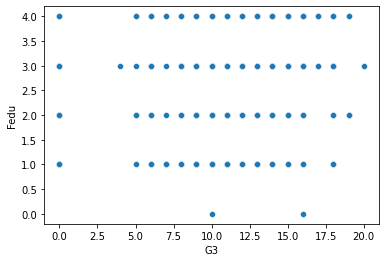

In [ ]:
sns.scatterplot(x="G3", y="Fedu", data=df1)

In [ ]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

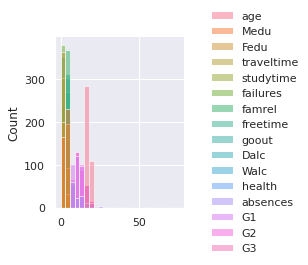

In [ ]:
sns.set_theme(style="darkgrid")

sns.displot(df1,  binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [ ]:
df1.Fjob.nunique()

5